In [1]:
import os
import re

from tqdm import tqdm
from natsort import natsorted

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import pdfplumber
# import pytesseract
import easyocr
# from langchain_community.document_loaders import (
#     UnstructuredPDFLoader,
#     PyMuPDFLoader,
# )

import random
import torch
seed = 42
random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = "./data/card"
data_list = [data_path + "/" + path for path in natsorted(os.listdir(data_path))]

# PDF Crop 테스트

In [8]:
print(os.path.basename(data_list[0]))

0_iM Social Worker카드.pdf


In [9]:
pdf_open = pdfplumber.open(data_list[0])

# 페이지 수 확인
pdf_pages = pdf_open.pages
pdf_pages

[<Page:1>, <Page:2>, <Page:3>, <Page:4>, <Page:5>, <Page:6>]

In [10]:
# PDF page to image
page_img = pdf_pages[0].to_image().original

In [11]:
# 이미지 세로, 가로 확인
page_img.height, page_img.width

(842, 596)

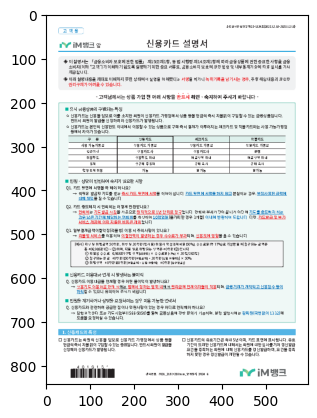

In [12]:
# 이미지 확인
page_img_np = np.array(page_img)
plt.imshow(page_img_np)
plt.show()

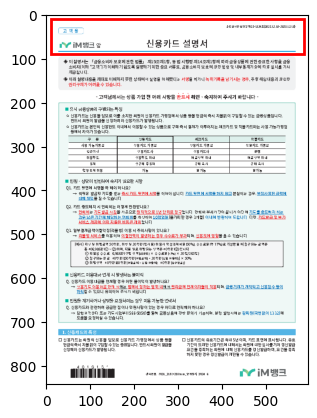

In [13]:
# 이미지 bounding box
bbox = (10, 10, 586, 90)
x0, top, x1, bottom = bbox
width = x1 - x0
height = bottom - top

fig, ax = plt.subplots(1)
ax.imshow(page_img_np)

rect = patches.Rectangle((x0, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.show()

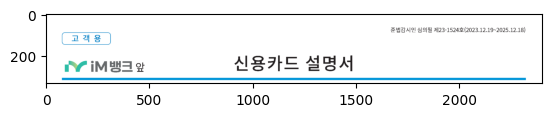

In [14]:
# bounding box에 해당하는 부분
page = pdf_pages[0]
bbox = (10, 10, 586, 90)

page_crop = page.within_bbox(bbox=bbox)
page_crop_img = page_crop.to_image(resolution=300).original
page_crop_img_np = np.array(page_crop_img)

plt.imshow(page_crop_img_np)
plt.show()

In [15]:
# 크롭된 영역에서 텍스트 추출
extracted_text = page_crop.extract_text()

# 추출된 텍스트 출력
print(extracted_text)

준법감시인 심의필 제23-1524호(2023.12.19~2025.12.18)
고 객 용
앞


In [16]:
# 이미지 저장
base_path = "./data/card"
base_name = os.path.basename(data_list[0]).split(".p")[0]
make_folder = f"{base_path}/image/{base_name}"
if not os.path.exists(make_folder):
    os.makedirs(make_folder)
num = 0
plt.imsave(f"{make_folder}/{num}.png", page_crop_img_np)

# 0_iM Social Worker카드

In [17]:
print(os.path.basename(data_list[0]))

0_iM Social Worker카드.pdf


## Page:1

In [18]:
pdf_open = pdfplumber.open(data_list[0])

# 페이지 수 확인
pdf_pages = pdf_open.pages
pdf_pages

[<Page:1>, <Page:2>, <Page:3>, <Page:4>, <Page:5>, <Page:6>]

In [23]:
# PDF page to image
page_img = pdf_pages[0].to_image().original

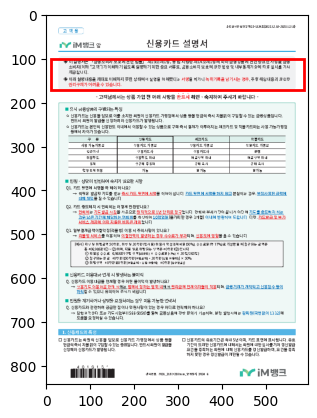

In [34]:
# 이미지 bounding box
bbox = (10, 100, 586, 170)
x0, top, x1, bottom = bbox
width = x1 - x0
height = bottom - top

fig, ax = plt.subplots(1)
ax.imshow(page_img_np)

rect = patches.Rectangle((x0, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)

plt.show()

- 10, 10, 586, 90
- 10, 90, 586, 180
- 10, 200, 586, 280
- 10, 275, 586, 370 (테이블)

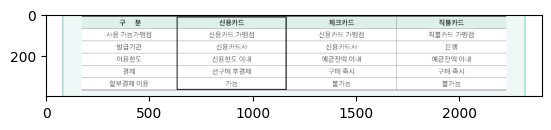

In [64]:
# bounding box에 해당하는 부분
page = pdf_pages[0]
bbox = (10, 275, 586, 370)

page_crop = page.within_bbox(bbox=bbox)
page_crop_img = page_crop.to_image(resolution=300).original
page_crop_img_np = np.array(page_crop_img)

plt.imshow(page_crop_img_np)
plt.show()

In [66]:
# 크롭된 영역에서 텍스트 추출
# extracted_text = page_crop.extract_text()
extracted_text = page_crop.extract_table()


# 추출된 텍스트 출력
print(extracted_text)

[['', '', '', ''], ['구 분', '신용카드', '체크카드', '직불카드'], ['사용 가능가맹점', '신용카드 가맹점', '신용카드 가맹점', '직불카드 가맹점'], ['발급기관', '신용카드사', '신용카드사', '은행'], ['이용한도', '신용한도 이내', '예금잔액 이내', '예금잔액 이내'], ['결제', '선구매 후결제', '구매 즉시', '구매 즉시']]


In [68]:
pd.DataFrame(extracted_text)

,0,1,2,3
0,,,,
1,구 분,신용카드,체크카드,직불카드
2,사용 가능가맹점,신용카드 가맹점,신용카드 가맹점,직불카드 가맹점
3,발급기관,신용카드사,신용카드사,은행
4,이용한도,신용한도 이내,예금잔액 이내,예금잔액 이내
5,결제,선구매 후결제,구매 즉시,구매 즉시


In [41]:
# 이미지 저장
base_path = "./data/card"
base_name = os.path.basename(data_list[0]).split(".p")[0]
make_folder = f"{base_path}/image/{base_name}"
if not os.path.exists(make_folder):
    os.makedirs(make_folder)
page_cond = "page1"
num = 1
plt.imsave(f"{make_folder}/{page_cond}_{num}.png", page_crop_img_np)

# EasyOCR

In [3]:
reader = easyocr.Reader(['ko','en'])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [7]:
results = reader.readtext('./data/card/image/0_iM Social Worker카드/0_iM Social Worker카드_1.jpg')

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
print(results)

In [6]:
from PIL import Image

try:
    img = Image.open('./data/card/image/0_iM Social Worker카드/0_iM Social Worker카드_1.jpg')
    img.show()  # 이미지가 제대로 열리는지 확인
except Exception as e:
    print(f"이미지 열기 오류: {e}")
